## Data Ethics Assignment

<hr>

## Introduction: As an online grocery delivery company, “Everyday Deals,” you are part of the data science team to scale up the business with the power of data. As part of the organization’s attempts to increase its sales, revenue, and profit and ultimately cover more markets in the country, your team is tasked to generate better product recommendations to existing customers so that there is higher customer engagement and reduced churn rate.

###  1) Importing Necessary Libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date 
import sklearn

import warnings 
warnings.filterwarnings("ignore")

# Assignment Part 1 

### Read the Dataset provided

In [8]:
df = pd.read_excel('DataEthicsAssignmentDataset.xlsx')
df.head()

,Order,Member,SKU,Created On,Description,Member's Full Name,Member's Address,Member's Email,Member's Phone Number,Member's Gender,Member's Date of Birth,Member's Membership Level,Member's Purchase History,Order Value,Payment Method,Delivery Address,Order Status,Credit Card Number
0,6422558,M27458,"15669789, 15669830, 34993978, 15669856, 775378...",28-09-2014,"Boiled Rice, Other Rice Products, Mosquito Rep...",Melissa Nielsen,"3260 Scott Fords, Port Richard, KY 71319",tina64@example.org,(981)315-0970,Male,16-02-1996,Silver,0,620,PayPal,"Unit 9405 Box 3979, DPO AA 03716",Shipped,NaN
1,6422636,M39021,"7580802, 15668453, 15668375, 15668379, 1566976...",28-09-2014,"Sunflower Oils, Brinjals, Root Vegetables, Oth...",Kevin Pennington,"19919 Lara Ferry, Jonesfurt, WY 70455",lisahorton@example.com,(808)745-0768x733,Male,30-04-1911,Gold,8,618,Credit Card,"PSC 8209, Box 7092, APO AP 28287",Delivered,3.509367e+15
2,6423338,M36366,"15668469, 15668478, 7586314, 15669800, 1566978...",28-09-2014,"Beans, Banana, Snacky Nuts, Cashews, Millet fl...",Jessica Nichols,"43026 Fisher Mount, New Karen, KY 94332",gordoncourtney@example.com,(912)707-8569x14006,Male,1924-10-02 00:00:00,Bronze,3,295,Cash,"666 Jennifer Mills Suite 089, New Travis, VI 9...",Shipped,NaN
3,6423534,M25900,"34987356, 15670251, 7585573, 34992815",28-09-2014,"Facial Tissues, Organic F&V, Cakes, Cookies",Jessica Guzman,"5071 Bell Knolls, Port Gabriellaburgh, AL 69223",ibell@example.com,(722)989-7498,Female,1953-08-01 00:00:00,Gold,7,881,Credit Card,"0279 Jason Forges Apt. 497, Andrewsborough, NV...",Pending,2.581849e+15
4,6423959,M57354,"34989501, 7580811, 7569799, 34938526",29-09-2014,"Other Pulses, Sunflower Oils, Snacks, Other Sw...",Matthew Davis,"44842 Pamela Street, Port Natashafort, AL 87144",nancy96@example.net,972-960-4816x5421,Male,1951-11-12 00:00:00,Bronze,5,595,Cash,"5038 Shane Rue Apt. 867, East Kenneth, AK 08214",Delivered,NaN


In [9]:
df['Created On'].unique()

array(['28-09-2014', '29-09-2014', '30-09-2014',
       datetime.datetime(2014, 10, 1, 0, 0),
       datetime.datetime(2014, 10, 2, 0, 0),
       datetime.datetime(2014, 10, 3, 0, 0),
       datetime.datetime(2014, 10, 4, 0, 0),
       datetime.datetime(2014, 10, 5, 0, 0),
       datetime.datetime(2014, 10, 6, 0, 0), '19-09-2014', '20-09-2014',
       '21-09-2014', '22-09-2014', '23-09-2014', '24-09-2014',
       '25-09-2014', '26-09-2014', '27-09-2014',
       datetime.datetime(2014, 9, 11, 0, 0),
       datetime.datetime(2014, 9, 12, 0, 0), '13-09-2014', '14-09-2014',
       '15-09-2014', '16-09-2014', '17-09-2014', '18-09-2014',
       datetime.datetime(2014, 9, 2, 0, 0),
       datetime.datetime(2014, 9, 3, 0, 0),
       datetime.datetime(2014, 9, 4, 0, 0),
       datetime.datetime(2014, 9, 5, 0, 0),
       datetime.datetime(2014, 9, 6, 0, 0),
       datetime.datetime(2014, 9, 7, 0, 0),
       datetime.datetime(2014, 9, 8, 0, 0),
       datetime.datetime(2014, 9, 9, 0, 0),
       d

In [10]:
df.shape

(8387, 18)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8387 entries, 0 to 8386
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Order                      8387 non-null   int64  
 1   Member                     8387 non-null   object 
 2   SKU                        8387 non-null   object 
 3   Created On                 8387 non-null   object 
 4   Description                8387 non-null   object 
 5   Member's Full Name         8387 non-null   object 
 6   Member's Address           8387 non-null   object 
 7   Member's Email             8387 non-null   object 
 8   Member's Phone Number      8387 non-null   object 
 9   Member's Gender            8387 non-null   object 
 10  Member's Date of Birth     8387 non-null   object 
 11  Member's Membership Level  8387 non-null   object 
 12  Member's Purchase History  8387 non-null   int64  
 13  Order Value                8387 non-null   int64

#### We see that date columns are all object, while date cannot be in object format hence need to be converted to " datetime " format

<hr>

### 2)  Data Pre processing

### Convert the object datatype for the columns "Created On" and "Date of Birth" to datetime

In [12]:
#Convert the Created Date to Date format
df['corrected_Created_date'] = pd.to_datetime(df['Created On'], format='%d-%m-%Y',errors='coerce')

In [13]:
#Convert the Created Date to Date format
df['Created_date_yy'] = pd.to_datetime(df['Created On'], format='%Y-%m-%d',errors='coerce')

In [14]:
df.corrected_Created_date.fillna(df.Created_date_yy, inplace=True)

In [15]:
# drop the original column which has object data type
df.drop(['Created_date_yy'],inplace=True, axis=1)

In [16]:
#Convert the Date of birth to Date format
df['corrected_members_dob'] = pd.to_datetime(df['Member\'s Date of Birth'], format='%d-%m-%Y',errors='coerce')
df['member_dob_yy'] = pd.to_datetime(df['Member\'s Date of Birth'], format='%Y-%m-%d',errors='coerce')
df.corrected_members_dob.fillna(df.member_dob_yy, inplace=True)
df.drop(['member_dob_yy'],inplace=True, axis=1)

In [17]:
# Find the total items bought by each members
df['Total_Items'] = [len(str(x).split(',')) for x in df.SKU]

In [18]:
# Calculate the age of the customers from Date of birth
def age(born):
    #born = datetime.strptime(born, "%Y/%m/%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

df['Age'] = df['corrected_members_dob'].apply(age)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8387 entries, 0 to 8386
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Order                      8387 non-null   int64         
 1   Member                     8387 non-null   object        
 2   SKU                        8387 non-null   object        
 3   Created On                 8387 non-null   object        
 4   Description                8387 non-null   object        
 5   Member's Full Name         8387 non-null   object        
 6   Member's Address           8387 non-null   object        
 7   Member's Email             8387 non-null   object        
 8   Member's Phone Number      8387 non-null   object        
 9   Member's Gender            8387 non-null   object        
 10  Member's Date of Birth     8387 non-null   object        
 11  Member's Membership Level  8387 non-null   object        
 12  Member

<hr>

## 3) Understand the buying pattern and trends of the existing customers

### Filter out only those columns that are needed to find the buying pattern

In [20]:
filt_df = df[['Order','Member','corrected_Created_date','Description','Total_Items','Member\'s Full Name','Member\'s Address',
             'Member\'s Gender','corrected_members_dob','Age','Member\'s Membership Level','Member\'s Purchase History',
             'Order Value','Payment Method','Order Status']]

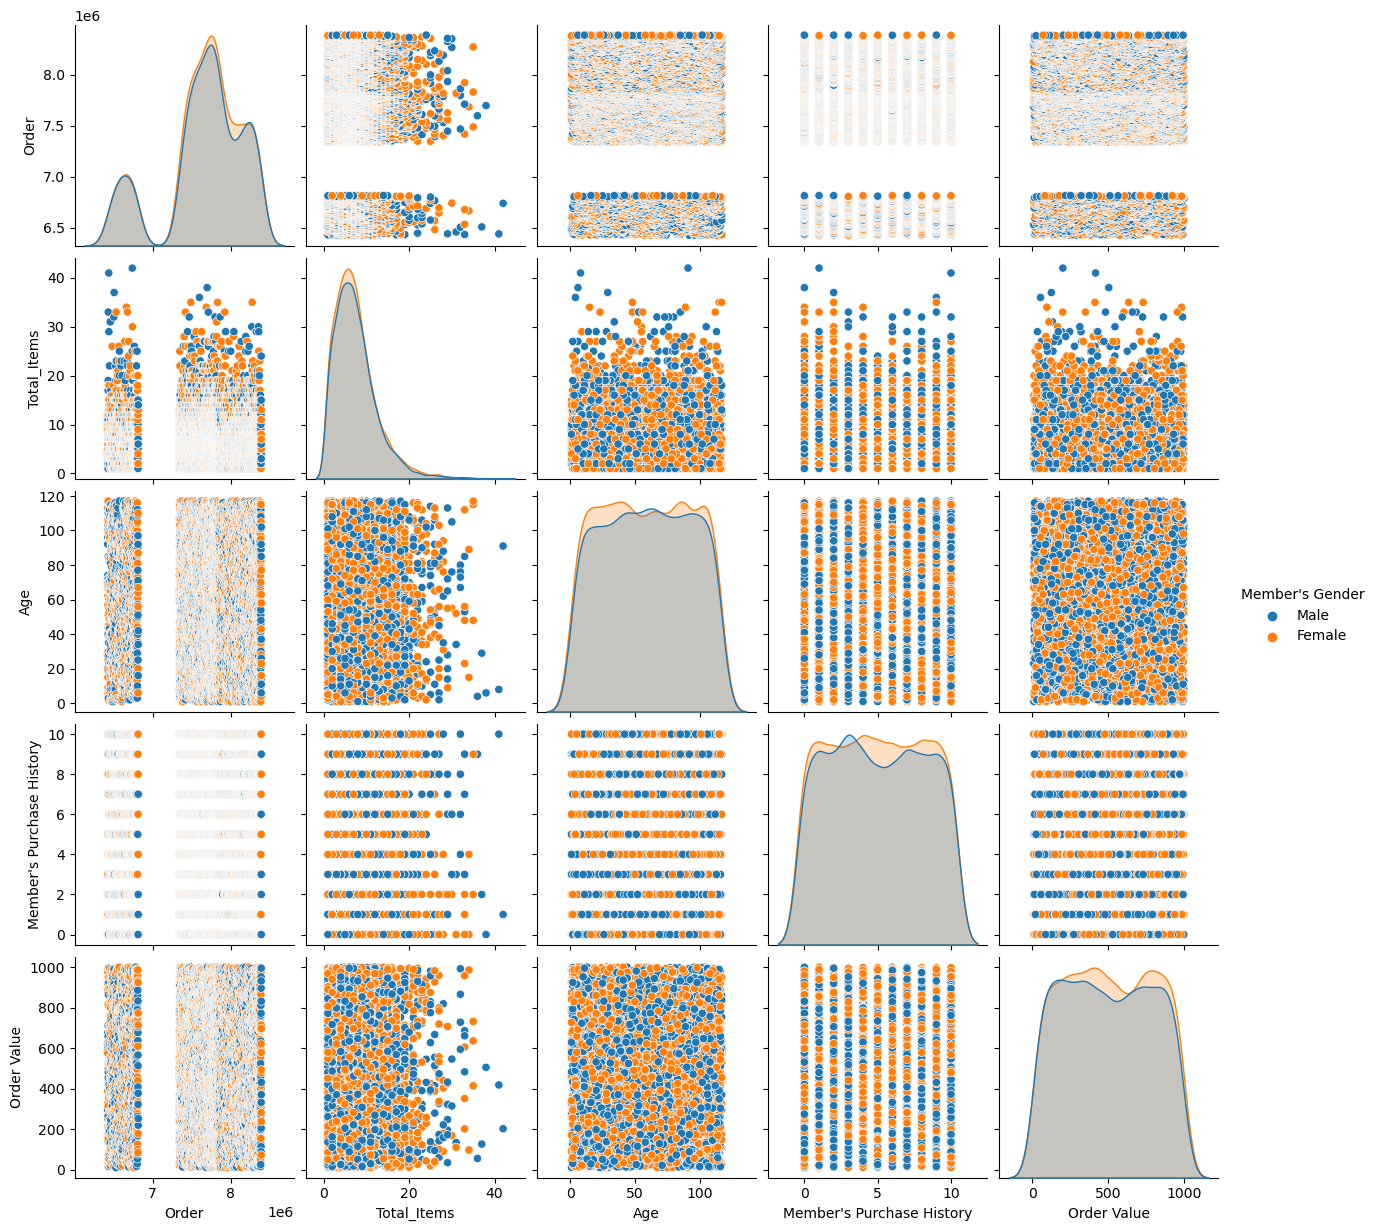

In [21]:
seaborn.pairplot(filt_df, hue ='Member\'s Gender')
plt.show()

From the pair plot of the Orders, we get to know that both Female and Male customers have placed similar number of orders. The Female customers have produced slightly more Order value

### 4) Spending pattern of customer based on number of orders placed on each day

In [22]:
pd.pivot_table(filt_df,values='Order',index='corrected_Created_date',columns='Member',aggfunc='count')

Member,M04158,M08075,M09303,M09736,M12050,M12127,M14746,M16218,M16611,M18732,...,M78720,M82651,M84827,M86304,M86572,M90375,M91098,M96365,M99030,M99206
corrected_Created_date,,,,,,,,,,,,,,,,,,,,,
2011-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-10-02,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


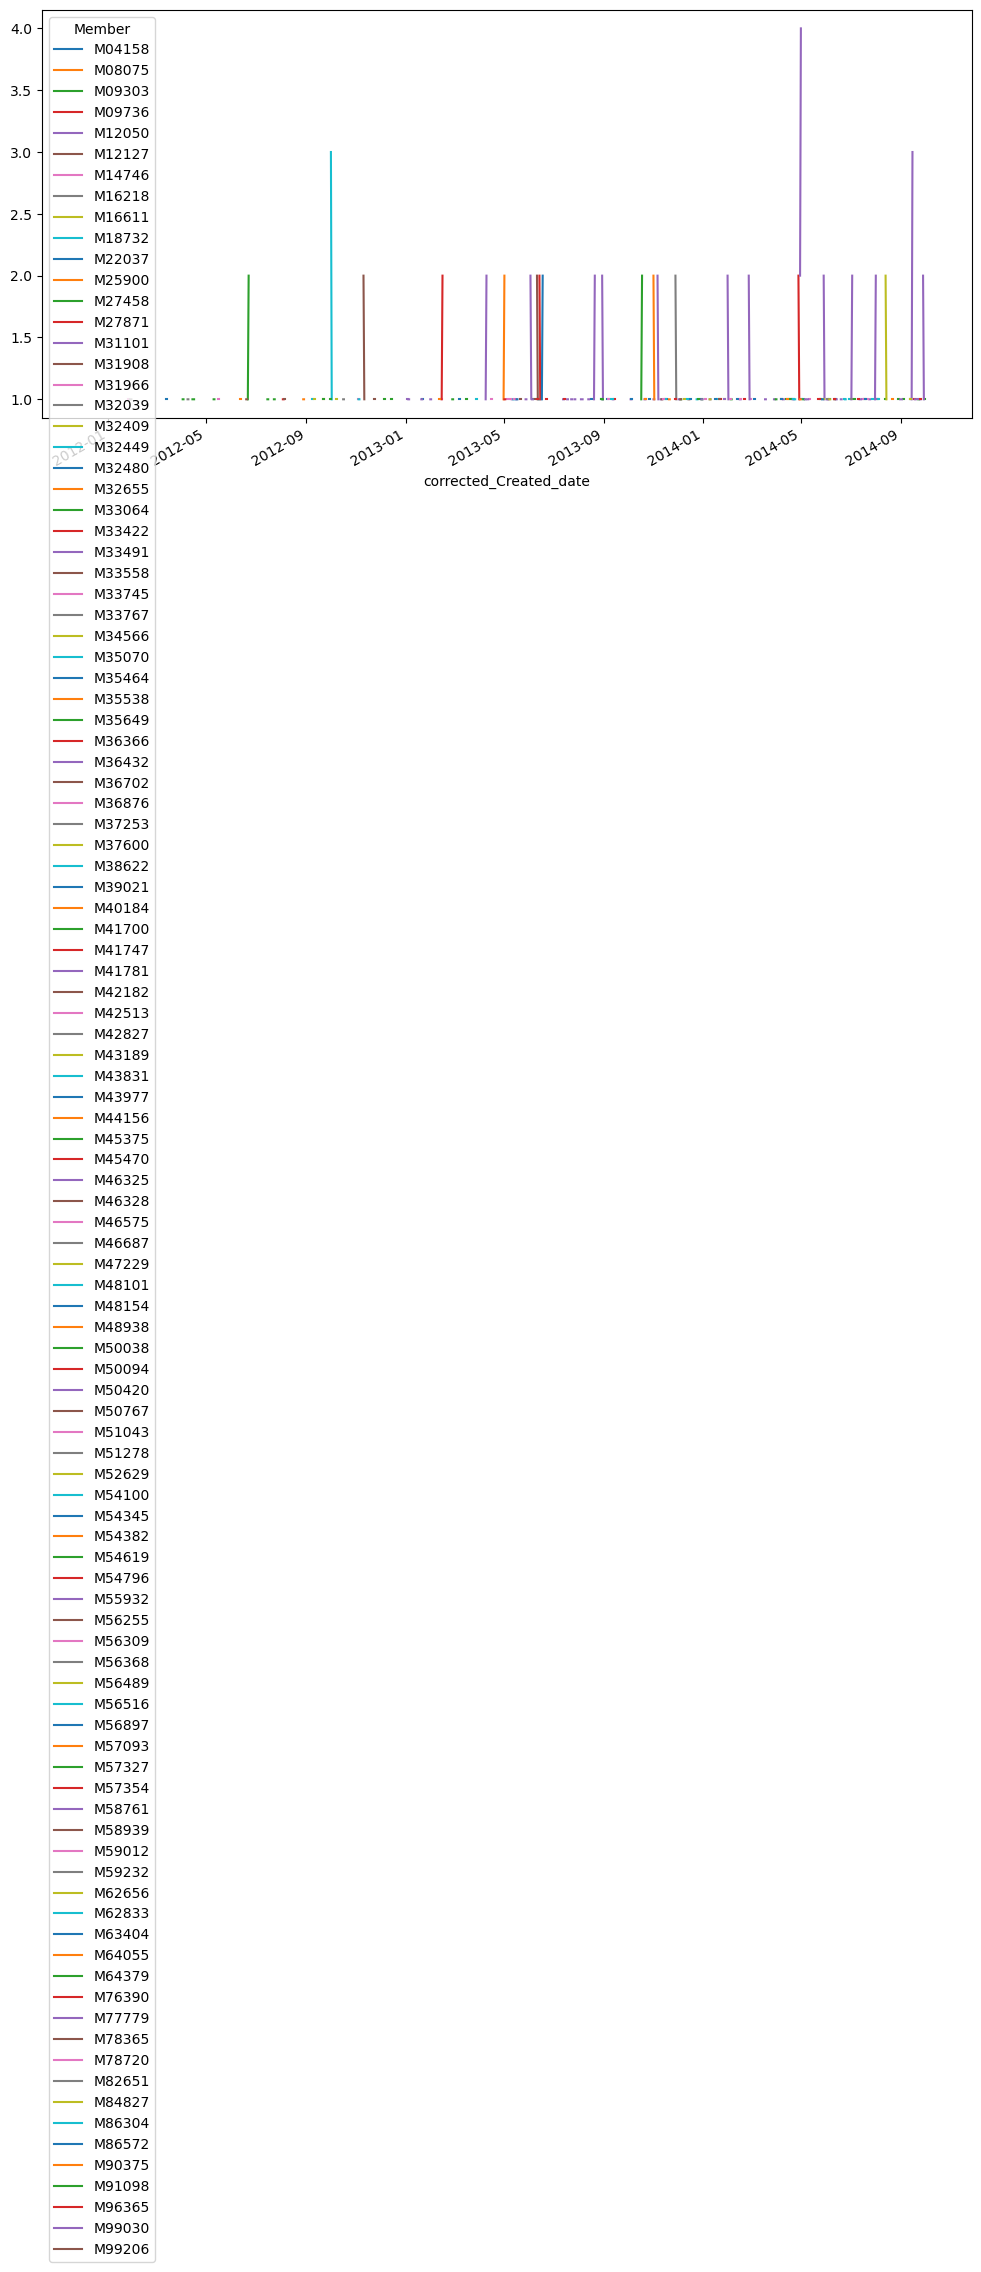

In [23]:
pd.pivot_table(filt_df,values='Order',index='corrected_Created_date',columns='Member',aggfunc='count').plot(figsize=(12,6))
plt.show()

Plotting the number of orders over time reveals seasonal patterns, spikes in purchase and the trend of a purchase by a particular customer. 
From the above plot, we can see that number of orders are more in the month of May and September. We can also see the customers with member ID M08075,M18732 and M31101 have ordered most number of times in the similar pattern. These customers are most likely will not churn

### 5) Calculate the moving average to find buying patter of each customer

In [24]:
member_df = filt_df.copy()
member_df.set_index('corrected_Created_date',inplace=True)
member_df.head()

,Order,Member,Description,Total_Items,Member's Full Name,Member's Address,Member's Gender,corrected_members_dob,Age,Member's Membership Level,Member's Purchase History,Order Value,Payment Method,Order Status
corrected_Created_date,,,,,,,,,,,,,,
2014-09-28,6422558,M27458,"Boiled Rice, Other Rice Products, Mosquito Rep...",9,Melissa Nielsen,"3260 Scott Fords, Port Richard, KY 71319",Male,1996-02-16,28,Silver,0,620,PayPal,Shipped
2014-09-28,6422636,M39021,"Sunflower Oils, Brinjals, Root Vegetables, Oth...",11,Kevin Pennington,"19919 Lara Ferry, Jonesfurt, WY 70455",Male,1911-04-30,113,Gold,8,618,Credit Card,Delivered
2014-09-28,6423338,M36366,"Beans, Banana, Snacky Nuts, Cashews, Millet fl...",12,Jessica Nichols,"43026 Fisher Mount, New Karen, KY 94332",Male,1924-10-02,100,Bronze,3,295,Cash,Shipped
2014-09-28,6423534,M25900,"Facial Tissues, Organic F&V, Cakes, Cookies",4,Jessica Guzman,"5071 Bell Knolls, Port Gabriellaburgh, AL 69223",Female,1953-08-01,71,Gold,7,881,Credit Card,Pending
2014-09-29,6423959,M57354,"Other Pulses, Sunflower Oils, Snacks, Other Sw...",4,Matthew Davis,"44842 Pamela Street, Port Natashafort, AL 87144",Male,1951-11-12,72,Bronze,5,595,Cash,Delivered


<hr>

### 6) Group by Member and calucate the moving average of total items bought by each customer over 30 days window.

In [25]:
member_df['SMA30'] = member_df.groupby('Member')['Total_Items'].transform(lambda x: x.rolling(30).mean())
member_df.dropna(inplace=True)
member_df

,Order,Member,Description,Total_Items,Member's Full Name,Member's Address,Member's Gender,corrected_members_dob,Age,Member's Membership Level,Member's Purchase History,Order Value,Payment Method,Order Status,SMA30
corrected_Created_date,,,,,,,,,,,,,,,
2014-07-19,6691796,M09303,"Banana, Ayurvedic Food, Jaggery, Organic Brand...",5,Malik Taylor,"485 Shaun Ford, Coxside, HI 69910",Female,1953-12-31,70,Gold,9,458,Cash,Shipped,4.166667
2014-07-22,6699324,M36432,Beans,1,Catherine Blackburn,"3011 Joseph Terrace, Wrightfurt, SC 16650",Male,1922-06-10,102,Silver,8,104,Credit Card,Shipped,4.666667
2014-07-22,6699488,M36432,Millet flour,1,Cathy Farrell,"03744 Myers Flats, East Maria, WA 51966",Female,2014-10-07,10,Gold,8,787,Cash,Delivered,4.666667
2014-07-22,6699907,M36432,"Whole Spices, Whole Spices, Gourd & Cucumber, ...",7,Eric Yoder,"81730 Roger Brook, Rodriguezside, VI 54269",Female,1977-02-04,47,Bronze,2,380,Cash,Pending,4.700000
2014-07-22,6701806,M09303,"Snacks, Cream Biscuits, Whole Spices, Gourd & ...",8,Howard Ross,"6325 Carlson Isle, Jacobbury, WI 21222",Female,1969-07-28,55,Silver,4,256,PayPal,Pending,4.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-11-20,8387964,M90375,"Organic F&V, Other Rice Products, Other Vegeta...",3,April Nelson,"6346 Faulkner Oval Suite 220, Jeffreyborough, ...",Male,1987-05-20,37,Bronze,3,370,Cash,Delivered,4.566667
2013-11-20,8387967,M44156,"Brinjals, Brinjals, Banana, Gourd & Cucumber, ...",6,Deborah Brown,"051 Schwartz Causeway Suite 430, Rothport, CO ...",Male,2013-04-28,11,Gold,2,995,Cash,Shipped,7.266667
2013-11-19,8388196,M91098,"Sunflower Oils, Boiled Rice, Whole Spices, Mil...",7,Tyler Velez,"837 Rodriguez Burg, North Roy, NV 81841",Female,1947-01-11,77,Silver,8,697,PayPal,Pending,7.300000


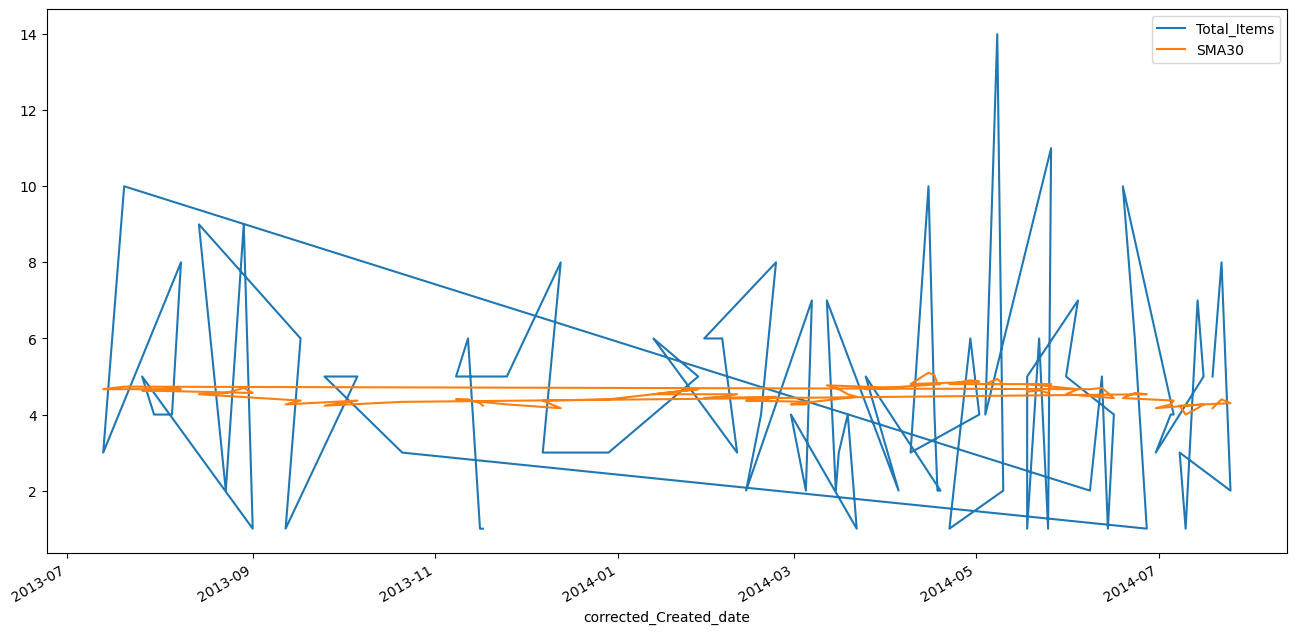

In [26]:
cust1_df = member_df[member_df['Member'] == 'M09303']
cust1_df[['Total_Items', 'SMA30']].plot(label='Member',figsize=(16, 8))
plt.show()

#### The spend pattern for customer 'M09303'shows more upward peaks which indicates that this customer purchases more frequently.

<br>

<hr>

### 7) Customer Segmentation based on order value

In [27]:
age18_25 = filt_df.Age[(filt_df.Age <= 25) & (filt_df.Age >= 18)]
age26_35 = filt_df.Age[(filt_df.Age <= 35) & (filt_df.Age >= 26)]
age36_45 = filt_df.Age[(filt_df.Age <= 45) & (filt_df.Age >= 36)]
age46_55 = filt_df.Age[(filt_df.Age <= 55) & (filt_df.Age >= 46)]
age55above = filt_df.Age[filt_df.Age >= 56]

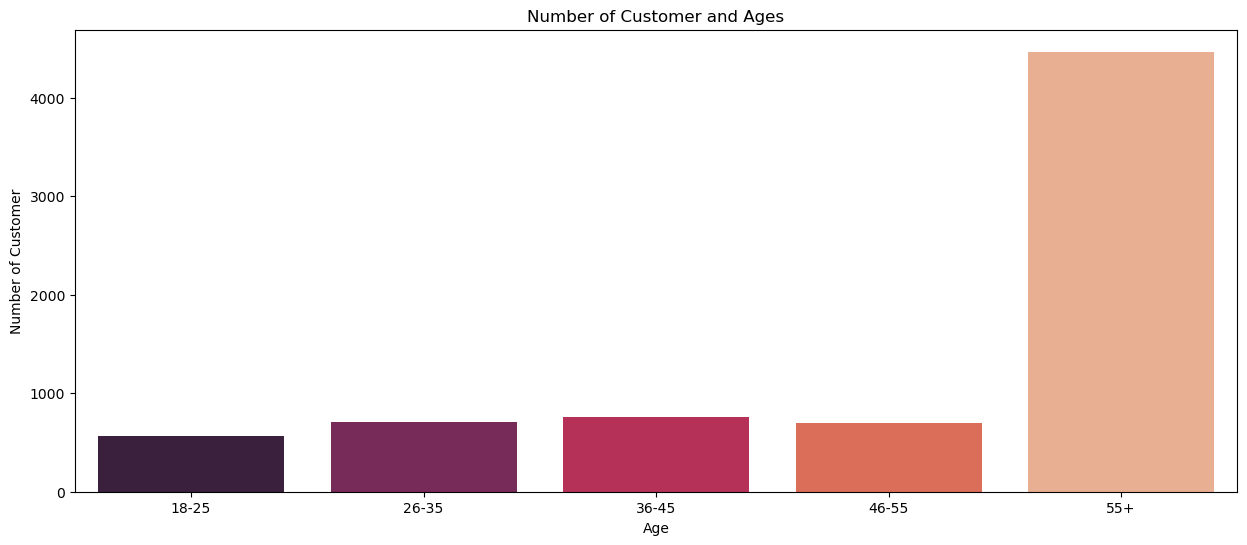

In [28]:
x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

#### As per the graph we can see that for the ages 55 and above are more dominant to purchases as compared to other age groups.

<hr>

### 8) Customer vs Order Values

In [29]:
filt_df['Order Value'].min()

10

In [30]:
filt_df['Order Value'].max()

1000

#### Subsetting the Order Value column into multiple sets for better visualization and understanding of spending ranges of customers

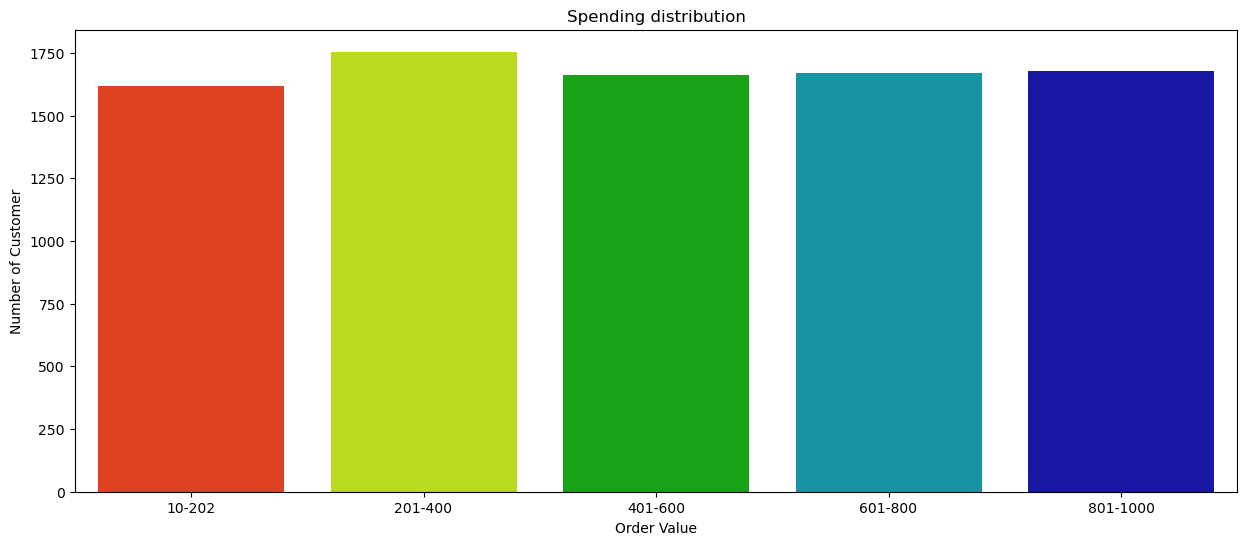

In [31]:
ss10_200 = filt_df["Order Value"][(filt_df["Order Value"] >= 10) & (filt_df["Order Value"] <= 200)]
ss201_400 = filt_df["Order Value"][(filt_df["Order Value"] >= 201) & (filt_df["Order Value"] <= 400)]
ss401_600 = filt_df["Order Value"][(filt_df["Order Value"] >= 401) & (filt_df["Order Value"] <= 600)]
ss601_800 = filt_df["Order Value"][(filt_df["Order Value"] >= 601) & (filt_df["Order Value"] <= 800)]
ss801_1000 = filt_df["Order Value"][(filt_df["Order Value"] >= 801) & (filt_df["Order Value"] <= 1000)]

ssx = ["10-202", "201-400", "401-600", "601-800", "801-1000"]
ssy = [len(ss10_200.values), len(ss201_400.values), len(ss401_600.values), len(ss601_800.values), len(ss801_1000.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending distribution")
plt.xlabel("Order Value")
plt.ylabel("Number of Customer")
plt.show()

#### Majority of the customers spend in the range of 201 to 400

<hr>

### 9) Customer grouping based on purchase behaviour

In [32]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cust_seg_df = filt_df[['Member\'s Gender','Age','Member\'s Membership Level','Order Value']]
cust_seg_df['Gender_Encoded'] = label_encoder.fit_transform(cust_seg_df['Member\'s Gender'])
cust_seg_df['Membership_Encoded'] = label_encoder.fit_transform(cust_seg_df['Member\'s Membership Level'])
cust_seg_df.drop(['Member\'s Gender','Member\'s Membership Level'],axis=1,inplace=True)
cust_seg_df.head()

,Age,Order Value,Gender_Encoded,Membership_Encoded
0,28,620,1,2
1,113,618,1,1
2,100,295,1,0
3,71,881,0,1
4,72,595,1,0


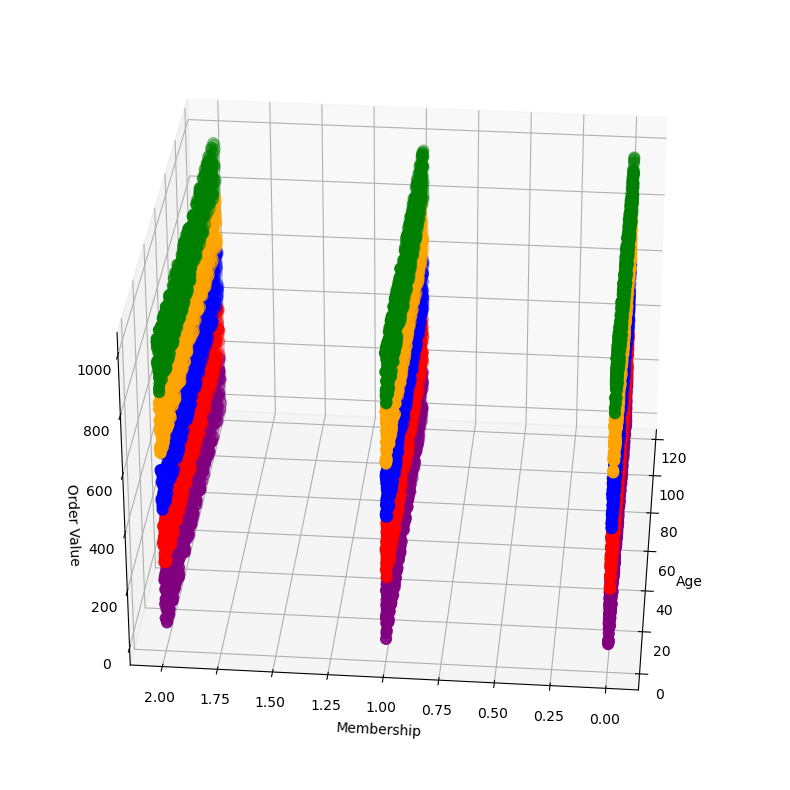

In [33]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
clusters = km.fit_predict(cust_seg_df)
cust_seg_df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cust_seg_df.Age[cust_seg_df.label == 0], cust_seg_df["Membership_Encoded"][cust_seg_df.label == 0], cust_seg_df["Order Value"][cust_seg_df.label == 0], c='blue', s=60)
ax.scatter(cust_seg_df.Age[cust_seg_df.label == 1], cust_seg_df["Membership_Encoded"][cust_seg_df.label == 1], cust_seg_df["Order Value"][cust_seg_df.label == 1], c='red', s=60)
ax.scatter(cust_seg_df.Age[cust_seg_df.label == 2], cust_seg_df["Membership_Encoded"][cust_seg_df.label == 2], cust_seg_df["Order Value"][cust_seg_df.label == 2], c='green', s=60)
ax.scatter(cust_seg_df.Age[cust_seg_df.label == 3], cust_seg_df["Membership_Encoded"][cust_seg_df.label == 3], cust_seg_df["Order Value"][cust_seg_df.label == 3], c='orange', s=60)
ax.scatter(cust_seg_df.Age[cust_seg_df.label == 4], cust_seg_df["Membership_Encoded"][cust_seg_df.label == 4], cust_seg_df["Order Value"][cust_seg_df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Membership")
ax.set_zlabel('Order Value')
plt.show()

In [34]:
pd.pivot_table(cust_seg_df,values='Order Value',index='Membership_Encoded',columns='label',aggfunc=np.mean)

label,0,1,2,3,4
Membership_Encoded,,,,,
0,501.449640,305.690114,898.835539,707.245810,110.347368
1,504.049236,307.993311,900.978062,706.269598,108.959292
2,504.783019,307.950931,903.378092,711.174709,110.690519


We have clustered the Customer based on age, membership and order Value using Kmeans clustering. We see that customer with Gold(1) and Silver(2) membership create High order values. Also people belonging to Cluster Group 1 and 3 produce more CLV to the company.

### 10) Analyze customer behavior based on Recency, Frequency, and Monetary value

In [35]:
filt_df['corrected_Created_date'].min()

Timestamp('2011-12-03 00:00:00')

In [36]:
recency_df = filt_df.groupby(['Member\'s Full Name'])['corrected_Created_date'].max().reset_index()
current_date = datetime.now()
recency_df['Recency (Days)'] = (current_date - recency_df['corrected_Created_date']).dt.days
recency_df.head()

,Member's Full Name,corrected_Created_date,Recency (Days)
0,Aaron Arellano,2014-01-07,3958
1,Aaron Benton,2013-07-18,4131
2,Aaron Gallagher,2014-03-12,3894
3,Aaron Harrison,2013-03-11,4260
4,Aaron Hayes,2013-09-08,4079


In [37]:
recency_df.describe()

,corrected_Created_date,Recency (Days)
count,7947,7947.000000
mean,2013-10-01 00:59:26.024914944,4055.958727
min,2011-12-03 00:00:00,3686.000000
25%,2013-04-19 00:00:00,3857.000000
50%,2013-10-24 00:00:00,4033.000000
75%,2014-04-18 00:00:00,4221.000000
max,2014-10-06 00:00:00,4724.000000
std,NaN,236.378379


Recency determine how recently a customer made a purchase. We will use this data to further segment if they churned or not churned. 

In [38]:
frequency_df = filt_df.groupby('Member\'s Full Name')['corrected_Created_date'].count().reset_index()

In [39]:
frequency_df.columns = ['Member\'s Full Name', 'Purchase Frequency']

In [40]:
frequency_df.describe()

,Purchase Frequency
count,7947.000000
mean,1.055367
std,0.269154
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,5.000000


Frequency of purchase shows how often customers make a purchase. We will use this data to further segment if they churn or not churn

In [41]:
monetary_df = filt_df.groupby('Member\'s Full Name')['Order Value'].sum().reset_index()
monetary_df.columns = ['Member\'s Full Name', 'CLV']
monetary_df.head()

,Member's Full Name,CLV
0,Aaron Arellano,190
1,Aaron Benton,514
2,Aaron Gallagher,592
3,Aaron Harrison,349
4,Aaron Hayes,893


In [42]:
monetary_df.describe()

,CLV
count,7947.000000
mean,530.105826
std,320.177597
min,10.000000
25%,265.000000
50%,516.000000
75%,776.000000
max,2754.000000


In [43]:
monetary_df[monetary_df['CLV']==10]

,Member's Full Name,CLV
799,Billy Bryant,10
2842,Harold Smith,10
3054,James Greene,10
3991,Juan Robertson,10
6904,Shannon Bowman,10


In [44]:
monetary_df[monetary_df['CLV']==2754]

,Member's Full Name,CLV
6351,Richard Allen,2754


#### The Customer Lifetime Value for each customer, which represents the potential value a customer brings to the company over time.

<hr>

### 11) Customer Segmentation and deciding which group will churn and which group will not churn

Choosing Customer Full name, Gender, Age, Membership Level, Total Items, Order Value, Recency, Frequency of Purchase and CLV for segmentation

In [45]:
cust_seg_df = filt_df[['Member\'s Full Name','Member\'s Gender','Age','Member\'s Membership Level','Total_Items','Order Value']]
cust_seg_df.head()

,Member's Full Name,Member's Gender,Age,Member's Membership Level,Total_Items,Order Value
0,Melissa Nielsen,Male,28,Silver,9,620
1,Kevin Pennington,Male,113,Gold,11,618
2,Jessica Nichols,Male,100,Bronze,12,295
3,Jessica Guzman,Female,71,Gold,4,881
4,Matthew Davis,Male,72,Bronze,4,595


In [46]:
# Merge the Recency df and Frequency df to get the Recency and frequency of items purchased
merge_df = pd.merge(recency_df,frequency_df,on='Member\'s Full Name')

In [47]:
# Merge the monetary df to get the CLV
merge_df = pd.merge(merge_df,monetary_df,on='Member\'s Full Name')

In [48]:
merge_df.head()

,Member's Full Name,corrected_Created_date,Recency (Days),Purchase Frequency,CLV
0,Aaron Arellano,2014-01-07,3958,1,190
1,Aaron Benton,2013-07-18,4131,1,514
2,Aaron Gallagher,2014-03-12,3894,1,592
3,Aaron Harrison,2013-03-11,4260,1,349
4,Aaron Hayes,2013-09-08,4079,1,893


In [49]:
# merge with Main data frame to procede with Kmeans clustering 
segmnt_df = pd.merge(cust_seg_df,merge_df,on='Member\'s Full Name')

In [50]:
segmnt_df.head()

,Member's Full Name,Member's Gender,Age,Member's Membership Level,Total_Items,Order Value,corrected_Created_date,Recency (Days),Purchase Frequency,CLV
0,Melissa Nielsen,Male,28,Silver,9,620,2014-09-28,3694,1,620
1,Kevin Pennington,Male,113,Gold,11,618,2014-09-28,3694,1,618
2,Jessica Nichols,Male,100,Bronze,12,295,2014-09-28,3694,1,295
3,Jessica Guzman,Female,71,Gold,4,881,2014-09-28,3694,1,881
4,Matthew Davis,Male,72,Bronze,4,595,2014-09-29,3693,2,956


In [51]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
segmnt_df['Gender_Encoded'] = label_encoder.fit_transform(segmnt_df['Member\'s Gender'])
segmnt_df['Membership_Encoded'] = label_encoder.fit_transform(segmnt_df['Member\'s Membership Level'])
segmnt_df.drop(['Member\'s Gender','Member\'s Membership Level','corrected_Created_date'],axis=1,inplace=True)
segmnt_df.head()

,Member's Full Name,Age,Total_Items,Order Value,Recency (Days),Purchase Frequency,CLV,Gender_Encoded,Membership_Encoded
0,Melissa Nielsen,28,9,620,3694,1,620,1,2
1,Kevin Pennington,113,11,618,3694,1,618,1,1
2,Jessica Nichols,100,12,295,3694,1,295,1,0
3,Jessica Guzman,71,4,881,3694,1,881,0,1
4,Matthew Davis,72,4,595,3693,2,956,1,0


<hr>

#### Perform kmeans clustring to segment the customers

In [52]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
clusters = km.fit_predict(segmnt_df.iloc[:,1:])
segmnt_df["label"] = clusters
segmnt_df.head()

,Member's Full Name,Age,Total_Items,Order Value,Recency (Days),Purchase Frequency,CLV,Gender_Encoded,Membership_Encoded,label
0,Melissa Nielsen,28,9,620,3694,1,620,1,2,1
1,Kevin Pennington,113,11,618,3694,1,618,1,1,1
2,Jessica Nichols,100,12,295,3694,1,295,1,0,0
3,Jessica Guzman,71,4,881,3694,1,881,0,1,1
4,Matthew Davis,72,4,595,3693,2,956,1,0,1


In [53]:
segment0_df = segmnt_df[segmnt_df['label']==0]
segment1_df = segmnt_df[segmnt_df['label']==1]

In [54]:
print(segment0_df.shape)
print(segment1_df.shape)

(4258, 10)
(4129, 10)


In [55]:
segment0_df.describe()

,Age,Total_Items,Order Value,Recency (Days),Purchase Frequency,CLV,Gender_Encoded,Membership_Encoded,label
count,4258.000000,4258.000000,4258.000000,4258.000000,4258.000000,4258.000000,4258.000000,4258.000000,4258.0
mean,59.390089,7.434007,269.585251,4055.953734,1.047440,284.371301,0.491310,1.006341,0.0
std,33.392559,5.047902,150.944218,237.002043,0.233659,160.415074,0.499983,0.812868,0.0
min,1.000000,1.000000,10.000000,3686.000000,1.000000,10.000000,0.000000,0.000000,0.0
25%,31.000000,4.000000,139.000000,3858.000000,1.000000,150.000000,0.000000,0.000000,0.0
50%,60.000000,7.000000,267.000000,4030.000000,1.000000,285.000000,0.000000,1.000000,0.0
75%,88.000000,10.000000,398.000000,4221.000000,1.000000,415.000000,1.000000,2.000000,0.0
max,117.000000,42.000000,547.000000,4719.000000,4.000000,918.000000,1.000000,2.000000,0.0


In [56]:
segment1_df.describe()

,Age,Total_Items,Order Value,Recency (Days),Purchase Frequency,CLV,Gender_Encoded,Membership_Encoded,label
count,4129.000000,4129.000000,4129.000000,4129.000000,4129.000000,4129.000000,4129.000000,4129.000000,4129.0
mean,58.853233,7.383628,742.275854,4040.968031,1.202955,849.163720,0.481230,1.024703,1.0
std,33.581878,4.870074,170.206201,233.310203,0.544067,276.131468,0.499708,0.816123,0.0
min,1.000000,1.000000,11.000000,3686.000000,1.000000,536.000000,0.000000,0.000000,1.0
25%,30.000000,4.000000,634.000000,3843.000000,1.000000,681.000000,0.000000,0.000000,1.0
50%,59.000000,7.000000,757.000000,4016.000000,1.000000,804.000000,0.000000,1.000000,1.0
75%,88.000000,10.000000,875.000000,4199.000000,1.000000,928.000000,1.000000,2.000000,1.0
max,117.000000,35.000000,1000.000000,4724.000000,5.000000,2754.000000,1.000000,2.000000,1.0


##### Using Kmeans clustering we have segmented the customer base into 2 groups based on Age, Total_Items purchased, Order Value, Recency, Purchase Frequency, CLV, Gender and Membership.
<hr>

 - After segmenting we see that Segment with label 0 and label 1 differ a lot in Order Value,Purchase Frequency and CLV.
    
 - The average Order Value of the customers in the segment 1 is higher than segment 0 customers by 36.31% .
 - The average Purchase Frequency of customer in the segment 1 is higher than segment 0 customers by 86.6 %.
 - The average CLV of customer in the segment 1 is higher than segment 0 customers by 33.48 %
<hr>

From the above inference we can see that customers in the segment 0 does not produce higher Order value, there purchase frequency is less and   customer life time value (CLV) is also less compared to customers in segment 1. Through this inferece we can conclude that customer in segment 0 are   more likely to churn out. The organisation should focus on retaining the customers in the segment 1 and try to by providing better product       recommendation based on the spending pattern analysed above to both the customer segment 0 so the people from segment 0 does not churn

<br>

<hr>

<br>

##  Customer Churn Modeling

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,confusion_matrix,f1_score,accuracy_score
from fairlearn.metrics import selection_rate, MetricFrame
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [58]:
segmnt_df.head()

,Member's Full Name,Age,Total_Items,Order Value,Recency (Days),Purchase Frequency,CLV,Gender_Encoded,Membership_Encoded,label
0,Melissa Nielsen,28,9,620,3694,1,620,1,2,1
1,Kevin Pennington,113,11,618,3694,1,618,1,1,1
2,Jessica Nichols,100,12,295,3694,1,295,1,0,0
3,Jessica Guzman,71,4,881,3694,1,881,0,1,1
4,Matthew Davis,72,4,595,3693,2,956,1,0,1


In [59]:
X = segmnt_df.iloc[:,1:-1]
y = segmnt_df.iloc[:,-1]

In [60]:
s = segmnt_df[['Age']]
# Change value to represent age groups
s['Age'] = np.where(s.Age > 58,'Over 58', '58 or younger') # because 58 is the average age of customer from the data analysis
s['Age'].value_counts()

Age
Over 58          4242
58 or younger    4145
Name: count, dtype: int64

In [61]:
G = segmnt_df[['Gender_Encoded']]
G['Gender_Encoded'].value_counts()# 0 is Female and 1 is Male

Gender_Encoded
0    4308
1    4079
Name: count, dtype: int64

In [62]:
X_train, X_test, y_train, y_test,S_train,S_test,G_train,G_test = train_test_split(X, y,s,G, test_size=0.2, random_state=0, stratify=y)

churn_model = DecisionTreeClassifier(max_depth=50, min_samples_split=50, min_samples_leaf=25,
                                  max_leaf_nodes=100, class_weight='balanced', ccp_alpha=0.0001).fit(X_train, y_train)

In [63]:
X_train.shape

(6709, 8)

In [64]:
X_test.shape

(1678, 8)

In [65]:
churn_model = DecisionTreeClassifier(max_depth=50, min_samples_split=50, min_samples_leaf=25,
                                  max_leaf_nodes=100, class_weight='balanced', ccp_alpha=0.0001).fit(X_train, y_train)

In [66]:
y_hat = churn_model.predict(X_test)

In [67]:
# Get overall metrics
print("Overall Metrics:")
# Get selection rate from fairlearn
overall_selection_rate = selection_rate(y_test, y_hat) # Get selection rate from fairlearn
print("\tSelection Rate:", overall_selection_rate)
# Get standard metrics from scikit-learn
overall_accuracy = accuracy_score(y_test, y_hat)
print("\tAccuracy:", overall_accuracy)
overall_recall = recall_score(y_test, y_hat)
print("\tRecall:", overall_recall)
overall_precision = precision_score(y_test, y_hat)
print("\tPrecision:", overall_precision)

# Get metrics by sensitive group from fairlearn
print('\nMetrics by Group:')
metrics = {'selection_rate': selection_rate,
           'accuracy': accuracy_score,
           'recall': recall_score,
           'precision': precision_score}

group_metrics = MetricFrame(metrics=metrics,
                             y_true=y_test,
                             y_pred=y_hat,
                             sensitive_features=S_test)

group_metrics1 = MetricFrame(metrics=metrics,
                             y_true=y_test,
                             y_pred=y_hat,
                             sensitive_features=G_test)

print(group_metrics.by_group)
print(group_metrics1.by_group)

Overall Metrics:
	Selection Rate: 0.4934445768772348
	Accuracy: 0.9952324195470799
	Recall: 0.9963680387409201
	Precision: 0.9939613526570048

Metrics by Group:
               selection_rate  accuracy    recall  precision
Age                                                         
58 or younger        0.502398  0.997602  0.997613   0.997613
Over 58              0.484597  0.992891  0.995086   0.990220
                selection_rate  accuracy    recall  precision
Gender_Encoded                                               
0                     0.523969  0.997770  0.997872   0.997872
1                     0.458387  0.992318  0.994382   0.988827


- In above we can see that in Age our model selection rate is for 58 or younger is **48%** and for over 58 is **50%** significantly different between different groups, it  indicates that our model is NOT biased. The model is not biased for Gender as well

- In this scenario, consider *recall*. This metric indicates the proportion of churn  cases that were correctly identified by the model. In other words, of all the customers who are actually churn, how many did the model find? The model does a best for all age group and both the gender.

<br>

<hr>

<br>

# Assignment - Part 2

In [68]:
df.head()

,Order,Member,SKU,Created On,Description,Member's Full Name,Member's Address,Member's Email,Member's Phone Number,Member's Gender,...,Member's Purchase History,Order Value,Payment Method,Delivery Address,Order Status,Credit Card Number,corrected_Created_date,corrected_members_dob,Total_Items,Age
0,6422558,M27458,"15669789, 15669830, 34993978, 15669856, 775378...",28-09-2014,"Boiled Rice, Other Rice Products, Mosquito Rep...",Melissa Nielsen,"3260 Scott Fords, Port Richard, KY 71319",tina64@example.org,(981)315-0970,Male,...,0,620,PayPal,"Unit 9405 Box 3979, DPO AA 03716",Shipped,NaN,2014-09-28,1996-02-16,9,28
1,6422636,M39021,"7580802, 15668453, 15668375, 15668379, 1566976...",28-09-2014,"Sunflower Oils, Brinjals, Root Vegetables, Oth...",Kevin Pennington,"19919 Lara Ferry, Jonesfurt, WY 70455",lisahorton@example.com,(808)745-0768x733,Male,...,8,618,Credit Card,"PSC 8209, Box 7092, APO AP 28287",Delivered,3.509367e+15,2014-09-28,1911-04-30,11,113
2,6423338,M36366,"15668469, 15668478, 7586314, 15669800, 1566978...",28-09-2014,"Beans, Banana, Snacky Nuts, Cashews, Millet fl...",Jessica Nichols,"43026 Fisher Mount, New Karen, KY 94332",gordoncourtney@example.com,(912)707-8569x14006,Male,...,3,295,Cash,"666 Jennifer Mills Suite 089, New Travis, VI 9...",Shipped,NaN,2014-09-28,1924-10-02,12,100
3,6423534,M25900,"34987356, 15670251, 7585573, 34992815",28-09-2014,"Facial Tissues, Organic F&V, Cakes, Cookies",Jessica Guzman,"5071 Bell Knolls, Port Gabriellaburgh, AL 69223",ibell@example.com,(722)989-7498,Female,...,7,881,Credit Card,"0279 Jason Forges Apt. 497, Andrewsborough, NV...",Pending,2.581849e+15,2014-09-28,1953-08-01,4,71
4,6423959,M57354,"34989501, 7580811, 7569799, 34938526",29-09-2014,"Other Pulses, Sunflower Oils, Snacks, Other Sw...",Matthew Davis,"44842 Pamela Street, Port Natashafort, AL 87144",nancy96@example.net,972-960-4816x5421,Male,...,5,595,Cash,"5038 Shane Rue Apt. 867, East Kenneth, AK 08214",Delivered,NaN,2014-09-29,1951-11-12,4,72


In [69]:
# Step 2: Identify Sensitive Columns
sensitive_columns = ["Member's Full Name", "Member's Address", "Member's Email", "Member's Phone Number", 
                     "Credit Card Number", "Delivery Address"]

# Create age bins and group members based on their age
age_bins = [0,18, 25, 35, 45, 55, float('inf')]
age_labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '55+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
df.drop(columns=["Age"], inplace=True)
df.drop(columns=["corrected_Created_date"], inplace=True)
df.drop(columns=["Member's Date of Birth"], inplace=True)
df.drop(columns=["corrected_members_dob"], inplace=True)

# Step 3b: Suppression
df.drop(columns=sensitive_columns, inplace=True)

df.head()

,Order,Member,SKU,Created On,Description,Member's Gender,Member's Membership Level,Member's Purchase History,Order Value,Payment Method,Order Status,Total_Items,Age Group
0,6422558,M27458,"15669789, 15669830, 34993978, 15669856, 775378...",28-09-2014,"Boiled Rice, Other Rice Products, Mosquito Rep...",Male,Silver,0,620,PayPal,Shipped,9,26-35
1,6422636,M39021,"7580802, 15668453, 15668375, 15668379, 1566976...",28-09-2014,"Sunflower Oils, Brinjals, Root Vegetables, Oth...",Male,Gold,8,618,Credit Card,Delivered,11,55+
2,6423338,M36366,"15668469, 15668478, 7586314, 15669800, 1566978...",28-09-2014,"Beans, Banana, Snacky Nuts, Cashews, Millet fl...",Male,Bronze,3,295,Cash,Shipped,12,55+
3,6423534,M25900,"34987356, 15670251, 7585573, 34992815",28-09-2014,"Facial Tissues, Organic F&V, Cakes, Cookies",Female,Gold,7,881,Credit Card,Pending,4,55+
4,6423959,M57354,"34989501, 7580811, 7569799, 34938526",29-09-2014,"Other Pulses, Sunflower Oils, Snacks, Other Sw...",Male,Bronze,5,595,Cash,Delivered,4,55+


In [71]:
df.to_csv('Data_Ethics_Assignment_Part_2_DeidentifiedOutput.csv', index=False) # saving the final output file